In [66]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

import ncxtutils
from scipy import ndimage as ndi

import numpy  as np
import matplotlib.pyplot as plt
import torch
import tomosipo as ts

from pathlib import Path

import tomosipo as ts


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
from figure3 import janelia_roi,janelia_circroi,InteriorPhantomPSF

In [68]:
ds = 1
phantom, pixel_size = janelia_roi(downscale=ds)
phantom_crop = janelia_circroi(phantom, pixel_size,downscale = ds)
roi_width = int(6 / pixel_size)
cell = InteriorPhantomPSF(phantom_crop, roi_width, pixel_size)



KeyboardInterrupt: 

Reconstructing...
Loading cached Projections


  0%|          | 0/100 [00:00<?, ?it/s]

Loading cached Projections


  0%|          | 0/100 [00:00<?, ?it/s]

Loading cached Projections


  0%|          | 0/100 [00:00<?, ?it/s]

Loading cached Projections


  0%|          | 0/100 [00:00<?, ?it/s]

Loading cached Projections
Loading cached Projections


c:\Users\axela\AppData\Local\miniconda3\lib\site-packages\tomosipo\links\torch.py:55: UserWarning: The parameter initial_value is of type torch.float64; expected `torch.float32`. The type has been automatically converted. Use `ts.link(x.to(dtype=torch.float32))' to inhibit this warning. 
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

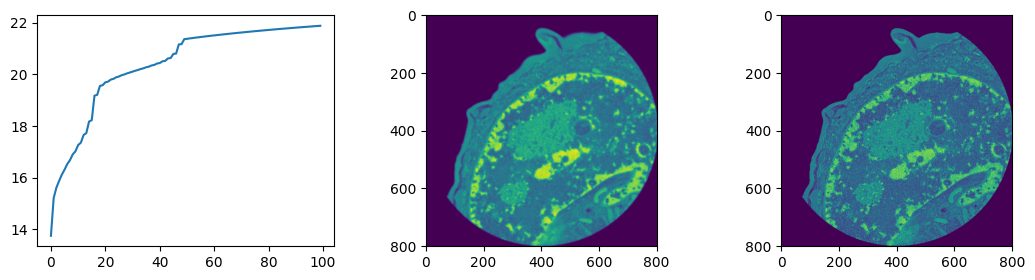

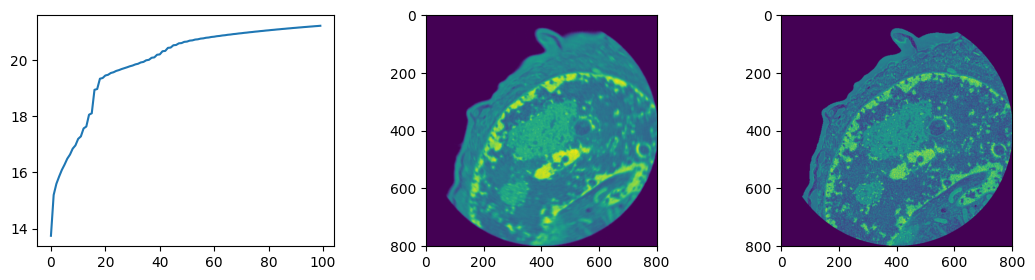

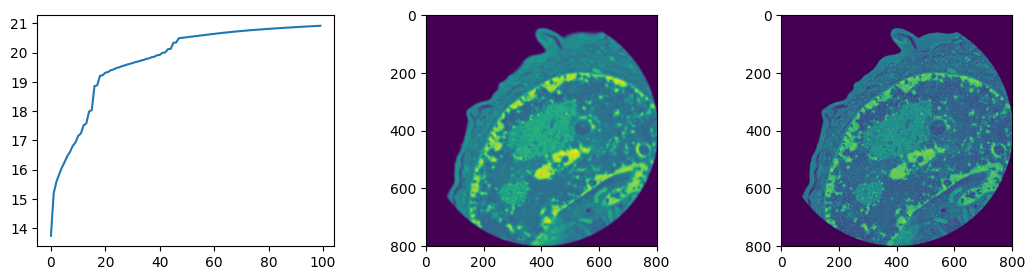

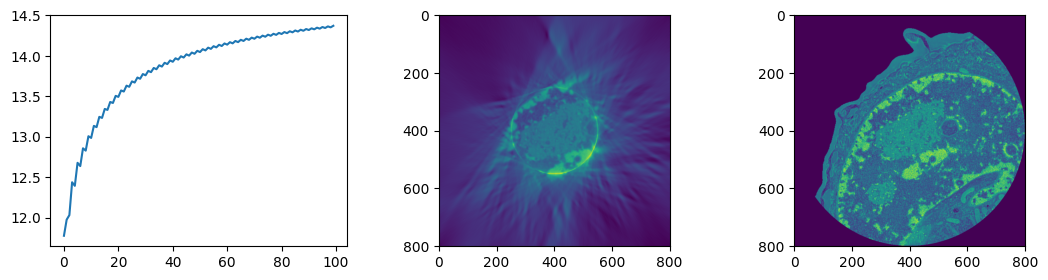

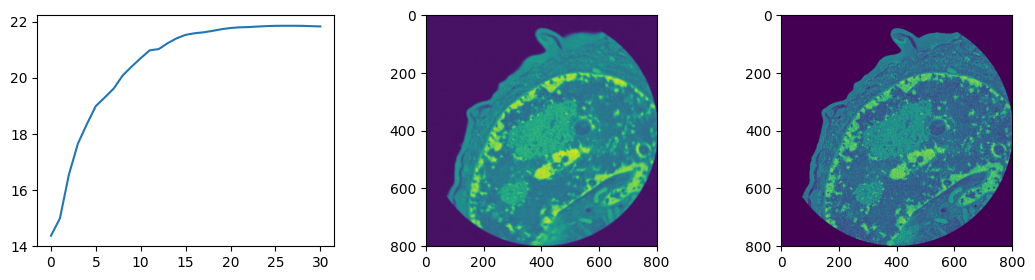

In [69]:
single_kwargs = {"n_angles": 499, "intensity": 10000, "noneg": True, "seed": 1}
mv_kwargs = {
    "n_angles_full": 499,
    "n_angles_roi": 499,
    "intensity_full": 10000,
    "intensity_roi": 10000,
    "noneg": True,
    "seed": 1,
}
extra_kwargs = {    "cache":False, 
        "plot":True,
        "n_max":300,}

print("Reconstructing...")
rec_35m_poisson = cell.oracle_rec_poisson("35m", **single_kwargs,**extra_kwargs)
rec_35_poisson = cell.oracle_rec_poisson("35", **single_kwargs,**extra_kwargs)
rec_60_poisson = cell.oracle_rec_poisson("60", **single_kwargs,**extra_kwargs)
rec_interior = cell.oracle_rec_interior_poisson("35", **single_kwargs,**extra_kwargs)
rec_mv = cell.oracle_rec_mv_poisson("60", "35", **mv_kwargs,**extra_kwargs)



In [ ]:
# dose per image
dpi = 2.294312200191294
intensity = 1000
n_images = 499
list_full = [11, 23, 47, 97, 199,307, 389]

kwargs = {"noneg":True,"cache":True, 
            "plot":True, "seed":1}
extra_kwargs = {"noneg":True,"cache":False, 
            "plot":True, "seed":1}


In [ ]:


ref_ref35 = cell.oracle_rec_poisson('35',n_images, intensity = intensity,**extra_kwargs) 
ref_ref60 = cell.oracle_rec_poisson('60',n_images, intensity = intensity,**extra_kwargs)

nfull 11 intensity 1000 dose 488000 I 2243 
Loading cached Projections
Loading cached Projections


c:\Users\axela\AppData\Local\miniconda3\lib\site-packages\tomosipo\links\torch.py:55: UserWarning: The parameter initial_value is of type torch.float64; expected `torch.float32`. The type has been automatically converted. Use `ts.link(x.to(dtype=torch.float32))' to inhibit this warning. 
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

Loading cached Projections
Loading cached Projections
sigma_full 1.27
sigma_roi 0.74


  0%|          | 0/100 [00:00<?, ?it/s]

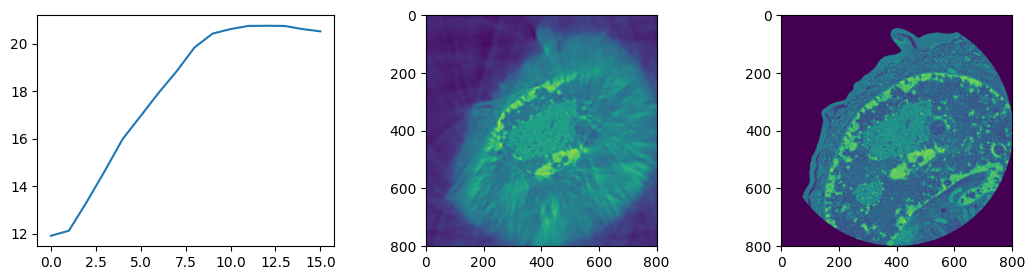

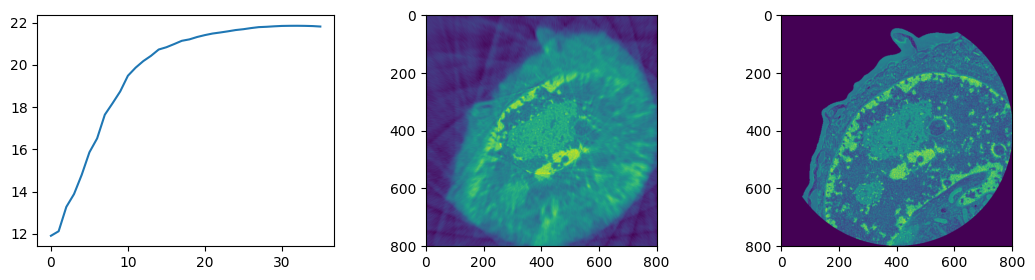

In [ ]:
n_full = list_full[0]
# leftover dose from removed full FOV scans
dose_left = intensity*(n_images-n_full) 
I_interior = int(dpi*dose_left/n_images)
print(f'nfull {n_full} intensity {intensity} dose {dose_left} I {I_interior} ')
kwargs_raw = { 
'intensity_full':intensity, 
'intensity_roi':I_interior}
rec_mv = cell.oracle_rec_mv_poisson('60','35',n_full, n_images,**kwargs_raw,**extra_kwargs)    
rec__mv_g = cell.oracle_rec_mv_poisson_deco_gauss('60','35',n_full, n_images,**kwargs_raw,**extra_kwargs) 


In [ ]:
old_rec_mv = cell.oracle_rec_mv_poisson('60','35',n_full, n_images,**kwargs_raw,**kwargs)    
old_rec__mv_g = cell.oracle_rec_mv_poisson_deco_gauss('60','35',n_full, n_images,**kwargs_raw,**kwargs) 

In [ ]:
from figure5 import roi_slice, get_psnr
def metric_psnr(x, y):
        return get_psnr(x, y, mask=cell.roi_mask(roi_width))

print(metric_psnr(old_rec_mv, cell.phantom_pix))
print(metric_psnr(old_rec__mv_g, cell.phantom_pix))
print()
print(metric_psnr(rec_mv, cell.phantom_pix))
print(metric_psnr(rec__mv_g, cell.phantom_pix))



20.37407789654264
21.802678617493882

20.757505572059237
21.85188803151645


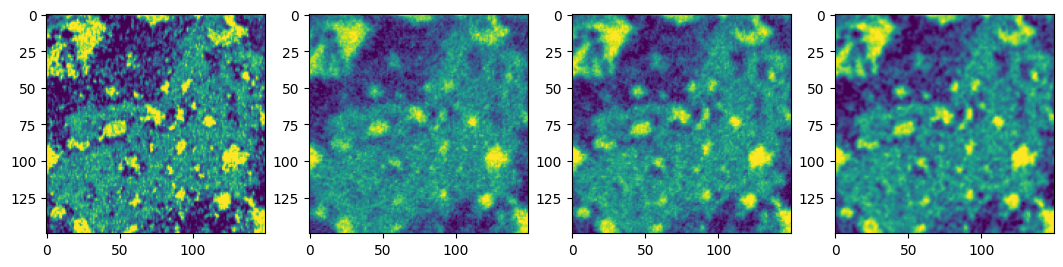

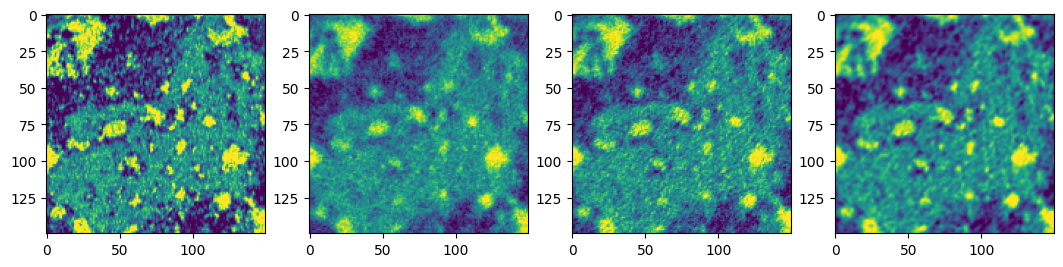

In [ ]:



disp_width = roi_width / 2
slice_nr = 48
ref_slice = roi_slice(cell.phantom_pix[slice_nr], disp_width)

clim = np.percentile(ref_slice, (5, 95))
f, ax = plt.subplots(ncols = 4, figsize = (13,5))
ax[0].imshow(roi_slice(cell.phantom_pix[slice_nr],disp_width),clim= clim)
ax[1].imshow(roi_slice(ref_ref35[slice_nr],disp_width),clim= clim)
# ax[2].imshow(roi_slice(ref_ref60[slice_nr],disp_width),clim= clim)
ax[2].imshow(roi_slice(rec_mv[slice_nr],disp_width),clim= clim)
ax[3].imshow(roi_slice(rec__mv_g[slice_nr],disp_width),clim= clim)

f, ax = plt.subplots(ncols = 4, figsize = (13,5))
ax[0].imshow(roi_slice(cell.phantom_pix[slice_nr],disp_width),clim= clim)
ax[1].imshow(roi_slice(ref_ref35[slice_nr],disp_width),clim= clim)
# ax[2].imshow(roi_slice(ref_ref60[slice_nr],disp_width),clim= clim)
ax[2].imshow(roi_slice(old_rec_mv[slice_nr],disp_width),clim= clim)
ax[3].imshow(roi_slice(old_rec__mv_g[slice_nr],disp_width),clim= clim)


In [ ]:
from figure5 import get_reconstructions
ref_ref35,recdict,recdict_deconv_g = get_reconstructions(cell)


  0%|          | 0/7 [00:00<?, ?it/s]

nfull 11 intensity 1000 dose 488000 I 2243 
Loading cached Projections
Loading cached Projections
sigma_full 0.32
sigma_roi 0.19
nfull 23 intensity 1000 dose 476000 I 2188 
Loading cached Projections
Loading cached Projections
sigma_full 0.32
sigma_roi 0.19
nfull 47 intensity 1000 dose 452000 I 2078 
Loading cached Projections
Loading cached Projections
sigma_full 0.32
sigma_roi 0.19
nfull 97 intensity 1000 dose 402000 I 1848 
Loading cached Projections
Loading cached Projections
sigma_full 0.32
sigma_roi 0.19
nfull 199 intensity 1000 dose 300000 I 1379 
Making rec_mv_ozw60_35_n199_499_nn1_I1000_1379(1)40x201x201_roi75_px80
full_width 285
psf_len 512
Loading cached PSF
Calculating forward projections for  60
Loading cached Projections


  0%|          | 0/100 [00:00<?, ?it/s]

vol is of shape (40, 201, 201)
Loading cached Projections
Loading cached Projections
sigma_full 0.32
sigma_roi 0.19
nfull 307 intensity 1000 dose 192000 I 882 
Making rec_mv_ozw60_35_n307_499_nn1_I1000_882(1)40x201x201_roi75_px80
full_width 285
psf_len 512
Loading cached PSF
Calculating forward projections for  60
Loading cached Projections


  0%|          | 0/100 [00:00<?, ?it/s]

vol is of shape (40, 201, 201)
Loading cached Projections
Loading cached Projections
sigma_full 0.32
sigma_roi 0.19
nfull 389 intensity 1000 dose 110000 I 505 
Making rec_mv_ozw60_35_n389_499_nn1_I1000_505(1)40x201x201_roi75_px80
full_width 285
psf_len 512
Loading cached PSF
Calculating forward projections for  60
Loading cached Projections


  0%|          | 0/100 [00:00<?, ?it/s]

vol is of shape (40, 201, 201)
Loading cached Projections
Loading cached Projections
sigma_full 0.32
sigma_roi 0.19


In [ ]:

ref_ref35

array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 7.3570851e-04],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 1.7043957e-04, 8.6605613e-04],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 1.0589346e-03, 1.1109953e-04],
        ...,
        [7.0476509e-04, 1.6923640e-04, 1.5676979e-04, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.2723034e-03, 1.0934060e-03, 7.5510668e-04, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [7.8250287e-04, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         9.8667783e-04, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.0681735e-04, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.696

In [ ]:
extra_kwargs = {"cache":True, 
                "plot":True}
print("Reconstructing...")
rec_35m_poisson = cell.oracle_rec_poisson("35m", **single_kwargs,**extra_kwargs)
rec_35_poisson = cell.oracle_rec_poisson("35", **single_kwargs,**extra_kwargs)
rec_60_poisson = cell.oracle_rec_poisson("60", **single_kwargs,**extra_kwargs)
rec_interior = cell.oracle_rec_interior_poisson("35", **single_kwargs,**extra_kwargs)
rec_mv = cell.oracle_rec_mv_poisson("60", "35", **mv_kwargs,**extra_kwargs)



Reconstructing...


Loading cached Projections


  0%|          | 0/10 [00:00<?, ?it/s]

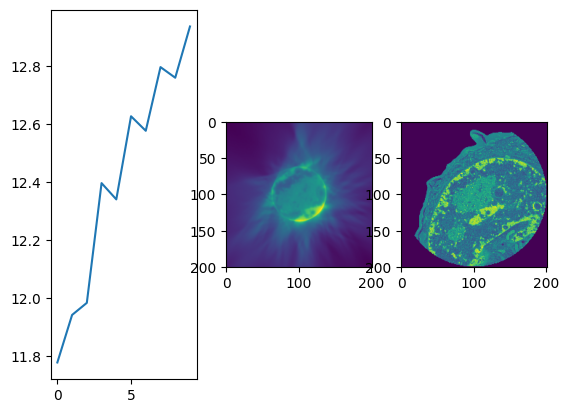

Loading cached Projections
Loading cached Projections


  0%|          | 0/10 [00:00<?, ?it/s]

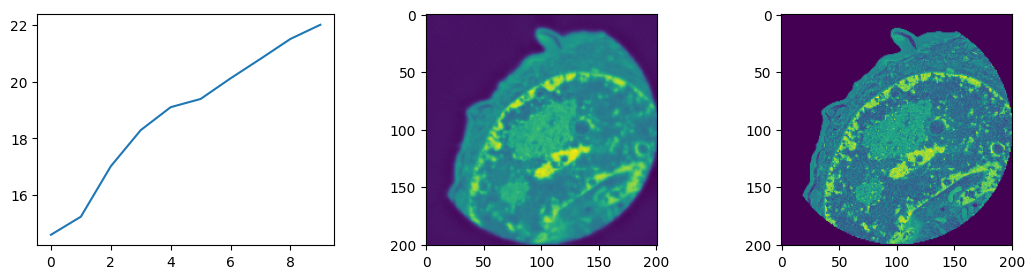